# Spotify Song Data - Binary Classification

This is a binary classification project that uses a dataset of Spotify song data to determine what features make a song popular on the platform, aka a hit song.

## Introduction

### Imports

In [55]:
# Regulars
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model evaluation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, plot_roc_curve

### Functions

#### Processing Functions

In [15]:
def get_info(df):
    '''Simple function that takes in a full dataframe and returns
    some basic information about the countents of the dataframe.'''
    
    print('Shape of DataFrame:\n', df.shape)
    print('\nDataFrame Info:')
    print(df.info())
    print('\n Null Values Present:\n', df.isna().sum())

#### Plotting Functions

##### Scikit-Learn Evaluations

In [58]:
def evaluate_model(model, X_test, y_test):
    '''Evaluates a scikit-learn classification model and displays a classification report, 
    a confusion matrix, and a ROC-AUC plot.
    
    -----------
    Parameters
    -----------
    model - the model you want to evaluate
    
    X_test - Dataset used in testing the model 
    
    y_test - Label used for predictions and evaluation the model'''
    
    # Predictions
    y_hat_test = model.predict(X_test)
    
    # Classification Report
    print('--------- Classification Report ----------\n')
    print(classification_report(y_test, y_hat_test))
    
    # Confusion Matrix
    fig, axes = plt.subplots(figsize = (12, 6), ncols = 2)
    plot_confusion_matrix(model, X_test, y_test, normalize = 'true',
                          cmap = 'Blues', ax = axes[0])
    
    # ROC-AUC Curve
    roc_auc_plot = plot_roc_curve(model, X_test, y_test, ax = axes[1])
    axes[1].legend()
    axes[1].plot([0,1], [0,1], ls = ':')
    axes[1].grid()
    axes[1].set_title('ROC-AUC Plot')
    fig.tight_layout()
    plt.show()

##### Tensorflow Evaluations

In [68]:
def network_eval_plots(results):
    history = results.history
    
    # Loss
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    
def nn_confusion_matrix(y_test, preds):
    labels = ['Hit', 'Dud']
    cm = confusion_matrix(y_test, preds, normalize = 'true')
    ax = plt.figure(figsize = (8, 8))
    ax = sns.heatmap(cm, cmap = 'Blues', annot = True, 
                     xticklabels = labels, yticklabels = labels)
    ax.set_ylim([0,2])
    
    
def evaluate_network(results, model, X_test, y_test):
    preds = model.predict(X_test).round()
    print('                 Model Evaluation')
    print('-------------------------------------------------------')
    print(model.evaluate(X_test, y_test))
    print(' ')
    print('                 Loss & Accuracy Curves')
    print('-------------------------------------------------------')
    network_eval_plots(results)
    print(' ')
    print('                 Classification Report')
    print('-------------------------------------------------------')
    print(classification_report(y_test, preds))
    print(' ')    
    print('                 Confusion Matrix')
    print('-------------------------------------------------------')
    nn_confusion_matrix(y_test, preds)    

## Obtain

### Import Dataset

In [17]:
df = pd.read_csv('spotify_song_data.csv')
print(df.shape)
df.head()

(174389, 19)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


## Data Cleaning

In [18]:
# Checking out some info

get_info(df)

Shape of DataFrame:
 (174389, 19)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness      

### Name

Let's set the song name as the index for the dataframe

In [19]:
df.set_index('name', inplace = True)
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,12,1920,0.0936,149.976,0.6340,1920
I Put A Spell On You,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,7,1920-01-05,0.0534,86.889,0.9500,1920
Golfing Papa,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,4,1920,0.1740,97.600,0.6890,1920
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,17,1920-01-01,0.0425,127.997,0.0422,1920
Xuniverxe,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,2,1920-10-01,0.0768,122.076,0.2990,1920


### ID

I suppose we can drop the ID column as it's not really necessary for this project at the moment.

In [20]:
df.drop('id', axis = 1, inplace = True)
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,1920,0.0936,149.976,0.6340,1920
I Put A Spell On You,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,1920-01-05,0.0534,86.889,0.9500,1920
Golfing Papa,0.993000,['Mamie Smith'],0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,1920,0.1740,97.600,0.6890,1920
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,1920-01-01,0.0425,127.997,0.0422,1920
Xuniverxe,0.295000,['Mixe'],0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,1920-10-01,0.0768,122.076,0.2990,1920


### Null Values

No nulls here, so we're in the clear!

In [21]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

### Release Date

Let's change the release date to a datetime object.

In [22]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,1920-01-01,0.0936,149.976,0.6340,1920
I Put A Spell On You,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,1920-01-05,0.0534,86.889,0.9500,1920
Golfing Papa,0.993000,['Mamie Smith'],0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,1920-01-01,0.1740,97.600,0.6890,1920
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,1920-01-01,0.0425,127.997,0.0422,1920
Xuniverxe,0.295000,['Mixe'],0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,1920-10-01,0.0768,122.076,0.2990,1920


### Year

Let's try a different approach here. At first, we changed the values of the year column to strings so that they wouldn't be affected by scaling. The drawback here is that we wound up with a massive amount of columns after one hot encoding it as a categorical column. Let's try binning year into decades to cut down on these columns.

In [23]:
df['year'].unique()

array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1968, 2008, 2018, 2020, 1997, 1991, 2006, 2012,
       2011, 2007, 1967, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1992, 1993, 1994, 1995, 1996, 1998, 1999, 2000,
       2019, 2013, 2001, 2017, 2016, 2010, 2002, 2004, 2005, 2015, 2003,
       2009, 2021, 2014])

In [24]:
for i in df['year']:
    if i >= 1920 and i < 1930:
        df['year'] = df['year'].replace(i, '1920s')
    elif i >= 1930 and i < 1940:
        df['year'] = df['year'].replace(i, '1930s')
    elif i >= 1940 and i < 1950:
        df['year'] = df['year'].replace(i, '1940s')
    elif i >= 1950 and i < 1960:
        df['year'] = df['year'].replace(i, '1950s')
    elif i >= 1960 and i < 1970:
        df['year'] = df['year'].replace(i, '1960s')
    elif i >= 1970 and i < 1980:
        df['year'] = df['year'].replace(i, '1970s')
    elif i >= 1980 and i < 1990:
        df['year'] = df['year'].replace(i, '1980s')
    elif i >= 1990 and i < 2000:
        df['year'] = df['year'].replace(i, '1990s')
    elif i >= 2000 and i < 2010:
        df['year'] = df['year'].replace(i, '2000s')
    elif i >= 2010 and i < 2020:
        df['year'] = df['year'].replace(i, '2010s')
    elif i >= 2020 and i < 2029:
        df['year'] = df['year'].replace(i, '2020s')

In [ ]:
df['year'].value_counts()

### Artists.

In [25]:
df['artists'].value_counts()

['Tadeusz Dolega Mostowicz']                                   1281
['Эрнест Хемингуэй']                                           1175
['Эрих Мария Ремарк']                                          1062
['Francisco Canaro']                                            951
['Ignacio Corsini']                                             624
                                                               ... 
['Parasite Child']                                                1
['Rita Ampatzi', 'Kostas', 'Giaoyzos', 'Klarino']                 1
['Ólafur Arnalds']                                                1
['Andy Lau']                                                      1
['เบนซ์-พริกไทย', 'รวมศิลปิน (เบส์ท ออฟ เดอะ เยียร์ 2010)']       1
Name: artists, Length: 36195, dtype: int64

Keeping all the artists in the artist column creates an issue when one hot encoding...namely that it expands to over 31k columns and creates an issue for running our models.  Let's do some exploration here and see if there's any way to bin artists in a sensible way.

In [26]:
df['artists'].value_counts().unique().sum()

31331

Wow...31k+ unique artists represented in this dataset.  This presents an interesting dilemma.  It doesn't seem too likely that we can figure out a way to bin this column in a sensible way.  We could separate the artists into bins of multiple artists and single artists for the tracks but that doesn't really take the individual artist popularity into account.  

For now, we're going to have to dump the artist column and then revisit this down the line after being able to get a few successful models running.

In [28]:
df.drop('artists', axis = 1, inplace = True)

### Popularity Column

This one is going to take some thought and research. We know that the popularity metric is a number from 1 to 100 that (with 100 being the most popular) that is assigned to a song to denote it's popularity. Spotify calculates this metric based on total streams, trends, and several other factors. First, we need to see what we're working with in terms of the value counts. Next, we need to make some sort of determination of what level of popularity constitutes as a hit song and the level that constitutes a dud.

<b> Note:</b> In the other notebook, we work on a multiclass version that creates 3 targets: hit, solid single, and dud.

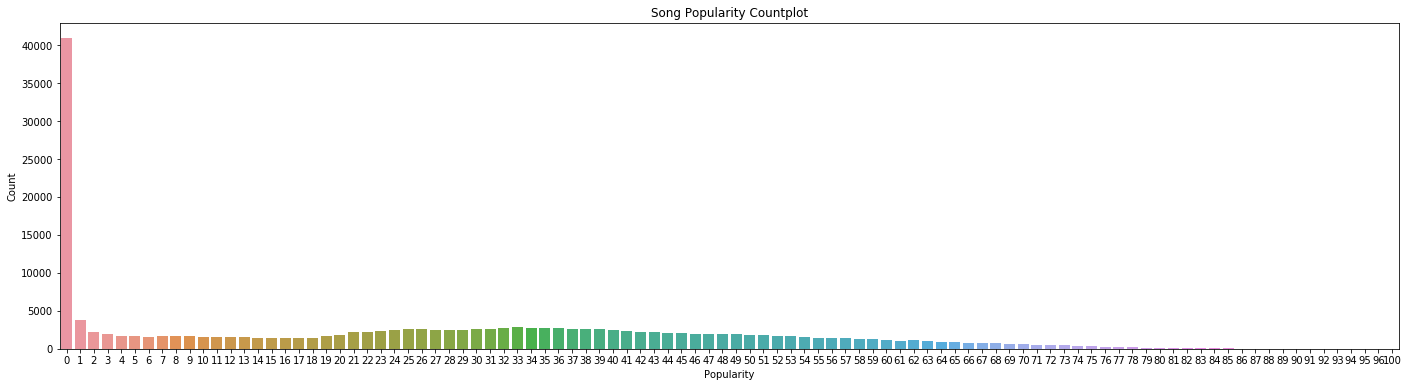

In [29]:
# Placeholder Plot

ax = plt.figure(figsize = (24, 6))
ax = sns.countplot(df['popularity'])
ax.set_title('Song Popularity Countplot')
ax.set_xlabel('Popularity')
ax.set_ylabel('Count')
plt.show();

> We can see from the figure above that an overhwelmingly large percentage of the songs have a popularity of 0 and the top of the scale is an extremely small percentage.  This is going to wreak havok on class weights.

<b>From Spotify:</b><br>
The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.

#### Binning Popularity

We'll make the following labels by binning hte popularity metric:<br>
0 - Not a hit<br>
1 - Hit

In [30]:
# Using the following code with various values to check what our thresholds should be

df[df["popularity"] == 65]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,,
Rudolph the Red-Nosed Reindeer,0.88300,0.629,186733,0.1590,0,0.000000,8,0.2220,-14.056,1,65,1947-01-01,0.0495,142.157,0.642,1940s
I Fall In Love Too Easily - Vocal Version,0.94000,0.532,201440,0.0657,0,0.004880,0,0.0946,-19.136,0,65,1956-01-01,0.0406,128.607,0.292,1950s
Pennies From Heaven,0.45200,0.515,141667,0.4080,0,0.000000,8,0.0682,-11.960,1,65,1957-01-01,0.1940,185.767,0.915,1950s
I'll Be Seeing You,0.98900,0.355,211533,0.0304,0,0.055500,1,0.1160,-20.479,1,65,1957-01-01,0.0361,90.495,0.188,1950s
Volare (Nel Blu Di Pinto Di Blu) - Remastered,0.88000,0.612,181627,0.1440,0,0.000000,6,0.2030,-12.204,0,65,1958-01-01,0.0352,128.629,0.343,1950s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Legacy (feat. Travis Scott & 21 Savage),0.17800,0.844,244941,0.5130,1,0.000000,1,0.0845,-8.769,1,65,2019-02-22,0.3350,128.085,0.344,2010s
NNAN,0.28100,0.817,193479,0.5390,1,0.000000,5,0.1990,-5.015,1,65,2019-09-27,0.0626,96.039,0.674,2010s
VALENTINO,0.19700,0.744,179133,0.7180,1,0.000000,9,0.1340,-4.853,0,65,2019-01-25,0.1810,151.098,0.549,2010s


> First we'll create strings and then label encode from there.  I'm sure there's an easier way, but this is what's worked for me to this point.

In [31]:
for i in df['popularity']:
    if i >= 65:
        df['popularity'] = df['popularity'].replace(i, 'Hit')
    else:
        df['popularity'] = df['popularity'].replace(i, 'Dud')

In [32]:
df['popularity'].value_counts()

Dud    166417
Hit      7972
Name: popularity, dtype: int64

In [33]:
# Now for encoding it for 1 and 0

for i in df['popularity']:
    if i == 'Hit':
        df['popularity'] = df['popularity'].replace(i, 1)
    else: 
        df['popularity'] = df['popularity'].replace(i, 0)

In [34]:
df['popularity'].value_counts()

0    166417
1      7972
Name: popularity, dtype: int64

## Data Processing

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Set X and Y
X = df.drop('popularity', axis = 1)
y = df['popularity']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

# See what we have
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_train.shape)

Shape of X_train: (139511, 15)
Shape of X_test: (34878, 15)
Shape of y_train (139511,)
Shape of y_test (139511,)


In [37]:
# Separate into num_cols and cat_cols
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('object').columns

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [43]:
# Create Pipelines for column transformer

num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder(handle_unknown = 'ignore', 
                                                              sparse = False))])

# Create preprocessing pipeline with column transformer
preprocessing = ColumnTransformer(transformers = [('num', num_transformer, num_cols),
                                                  ('cat', cat_transformer, cat_cols)])

X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed = preprocessing.transform(X_test)

In [44]:
# Get components together to make a dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_features = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)

# Put data back into a clean dataframe
X_train_df = pd.DataFrame(X_train_processed, columns = [*num_cols, *cat_features])
X_test_df = pd.DataFrame(X_test_processed, columns = [*num_cols, *cat_features])

#### Final Clean Dataframe

In [45]:
X_train_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,year_1930s,year_1940s,year_1950s,year_1960s,year_1970s,year_1980s,year_1990s,year_2000s,year_2010s,year_2020s
0,-1.299562,1.556711,1.435024,1.028590,3.695202,2.029732,0.226166,-0.560845,0.398806,0.650954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.313867,0.074183,0.139441,1.035929,-0.270621,2.017785,0.510619,-0.438669,0.538275,0.650954,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.133647,-0.385911,-0.081235,0.081851,-0.270621,-0.589023,-1.480552,-0.874616,-0.133776,0.650954,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.241662,-1.618511,-0.117687,-0.971305,-0.270621,0.130043,-0.911646,0.460994,0.014827,0.650954,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.810036,1.085256,-0.410690,-0.119974,-0.270621,-0.589793,1.079525,0.338818,1.146212,0.650954,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
X_test_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,year_1930s,year_1940s,year_1950s,year_1960s,year_1970s,year_1980s,year_1990s,year_2000s,year_2010s,year_2020s
0,0.825828,0.233228,0.059099,-0.483257,-0.270621,-0.589808,1.648431,-0.488650,-0.120075,-1.536206,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.310485,-0.834646,-0.985601,1.582690,-0.270621,-0.589808,-0.342740,3.765311,0.824766,-1.536206,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.270613,-0.868727,0.097934,-0.149330,-0.270621,-0.551277,-0.911646,0.749775,-0.068257,-1.536206,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.257454,1.085256,-0.361463,-1.077722,-0.270621,-0.589780,-0.627193,1.732740,-0.225116,0.650954,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.865306,-1.947961,1.608862,-0.483257,-0.270621,2.131288,-1.480552,-0.549738,-0.630349,0.650954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Exploration

In [47]:
# Use original dataframe for this

df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
name,,,,,,,,,,,,,,,,
Keep A Song In Your Soul,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,0,1920-01-01,0.0936,149.976,0.6340,1920s
I Put A Spell On You,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,0,1920-01-05,0.0534,86.889,0.9500,1920s
Golfing Papa,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,0,1920-01-01,0.1740,97.600,0.6890,1920s
True House Music - Xavier Santos & Carlos Gomix Remix,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,0,1920-01-01,0.0425,127.997,0.0422,1920s
Xuniverxe,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,0,1920-10-01,0.0768,122.076,0.2990,1920s


## Modeling

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

#### Base Model

/Users/spags/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     33323
           1       0.17      0.80      0.29      1555

    accuracy                           0.82     34878
   macro avg       0.58      0.81      0.59     34878
weighted avg       0.95      0.82      0.87     34878



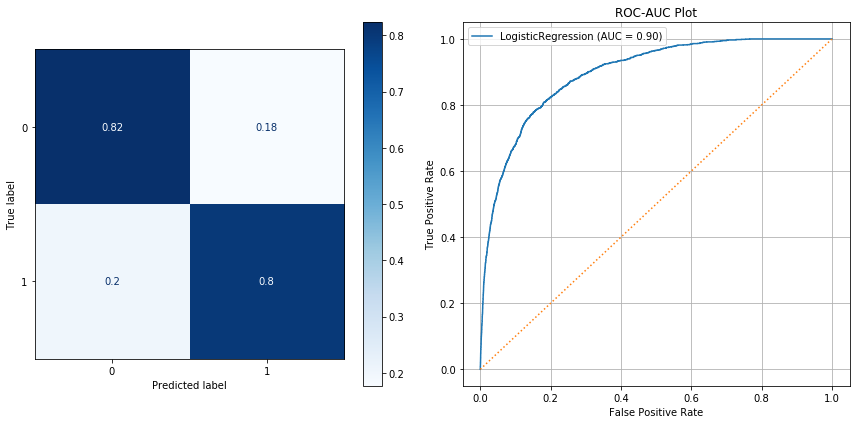

In [59]:
# Set model 
log = LogisticRegression(class_weight = 'balanced', 
                         random_state = 30)

# Fit model
log.fit(X_train_df, y_train)

# Evaluate Model
evaluate_model(log, X_test_df, y_test)

#### LogisticRegressionCV

Trying this out.  Essentially Logistic Regression with built in cross validation.

In [71]:
from sklearn.linear_model import LogisticRegressionCV

/Users/spags/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/spags/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     33323
           1       0.18      0.80      0.29      1555

    accuracy                           0.82     34878
   macro avg       0.58      0.81      0.59     34878
weighted avg       0.95      0.82      0.87     34878



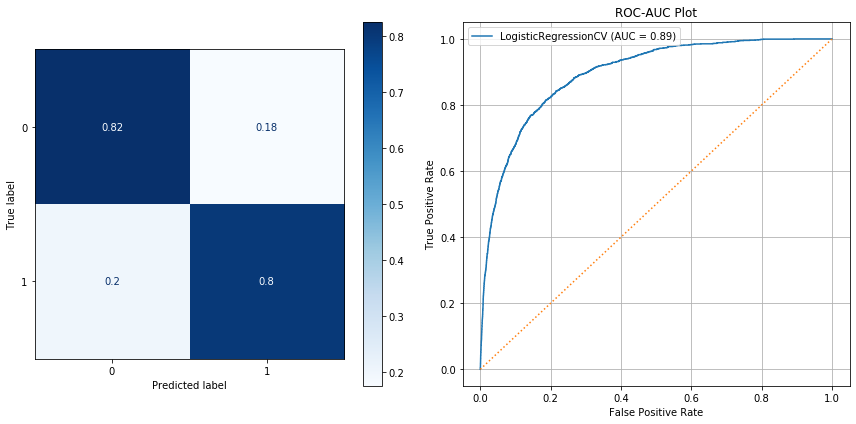

In [72]:
# Set model 
log_cv = LogisticRegressionCV(class_weight = 'balanced', 
                         random_state = 30)

# Fit model
log_cv.fit(X_train_df, y_train)

# Evaluate Model
evaluate_model(log_cv, X_test_df, y_test)

### SGD

In [76]:
from sklearn.linear_model import SGDClassifier

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     33323
           1       0.19      0.78      0.30      1555

    accuracy                           0.84     34878
   macro avg       0.59      0.81      0.61     34878
weighted avg       0.95      0.84      0.88     34878



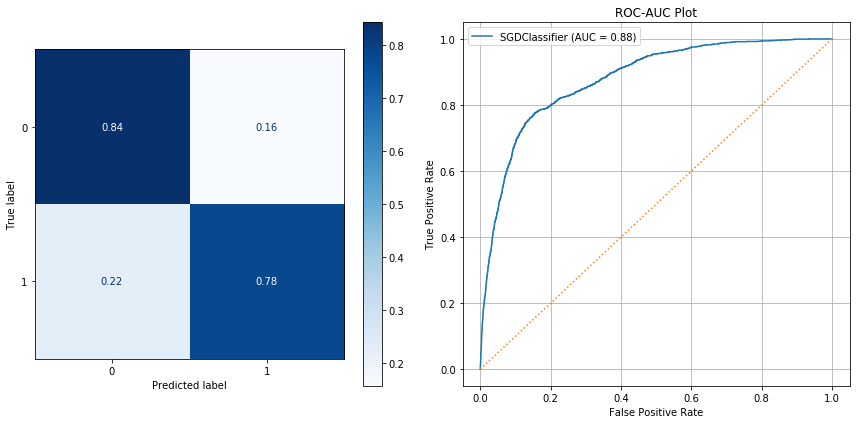

In [77]:
# Set model
sgd = SGDClassifier(class_weight = 'balanced',
                    random_state = 30)

# Fit model
sgd.fit(X_train_df, y_train)

# Evaluate Model
evaluate_model(sgd, X_test_df, y_test)

### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

#### Base Model

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     33323
           1       0.30      0.30      0.30      1555

    accuracy                           0.94     34878
   macro avg       0.64      0.63      0.63     34878
weighted avg       0.94      0.94      0.94     34878



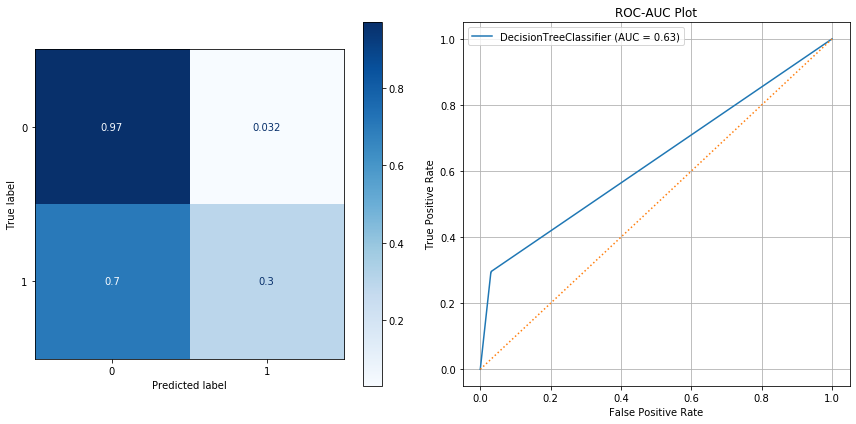

In [61]:
# Set model
tree = DecisionTreeClassifier(class_weight = 'balanced',
                              random_state = 30)

# Fit model
tree.fit(X_train_df, y_train)

# Evaluate Model
evaluate_model(tree, X_test_df, y_test)

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

#### Base Model

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     33323
           1       0.64      0.19      0.30      1555

    accuracy                           0.96     34878
   macro avg       0.80      0.59      0.64     34878
weighted avg       0.95      0.96      0.95     34878



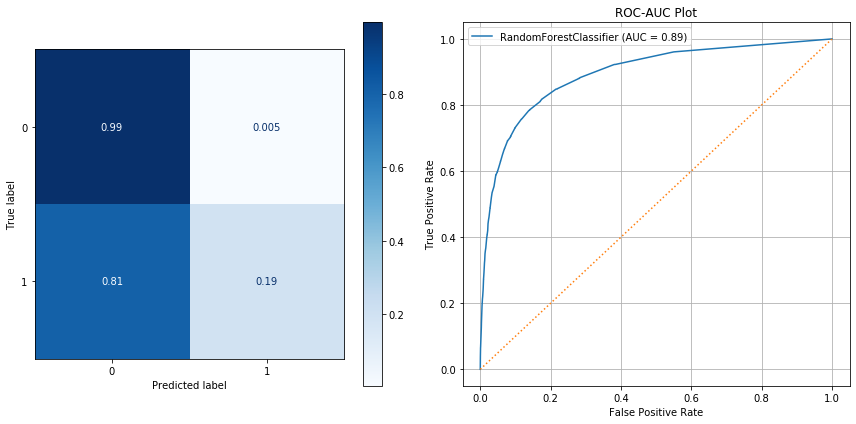

In [63]:
# Set model
rf = RandomForestClassifier(class_weight = 'balanced', 
                            random_state = 30)

# Fit Model
rf.fit(X_train_df, y_train)

# Evaluate Model
evaluate_model(rf, X_test_df, y_test)

### XGBoost

In [64]:
from xgboost import XGBClassifier

#### Base Model

--------- Classification Report ----------

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     33323
           1       0.70      0.13      0.22      1555

    accuracy                           0.96     34878
   macro avg       0.83      0.57      0.60     34878
weighted avg       0.95      0.96      0.95     34878



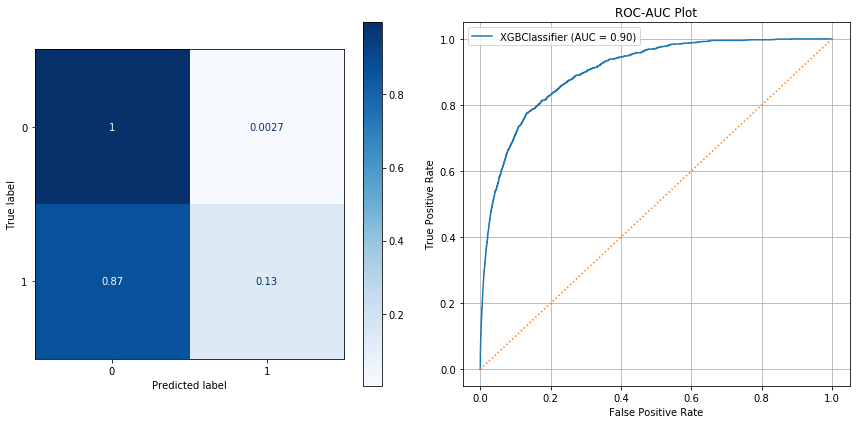

In [65]:
# Set model
xgb = XGBClassifier()

# Fit model
xgb.fit(X_train_df, y_train)

# Evaluate Model
evaluate_model(xgb, X_test_df, y_test)

### Neural Network

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping

#### Super Basic Model

Epoch 1/50
3052/3052 [==============================] - 5s 2ms/step - loss: 0.1424 - accuracy: 0.9519 - val_loss: 0.1251 - val_accuracy: 0.9569
Epoch 2/50
3052/3052 [==============================] - 5s 2ms/step - loss: 0.1293 - accuracy: 0.9558 - val_loss: 0.1230 - val_accuracy: 0.9586
Epoch 3/50
3052/3052 [==============================] - 5s 2ms/step - loss: 0.1279 - accuracy: 0.9557 - val_loss: 0.1224 - val_accuracy: 0.9588
Epoch 4/50
3052/3052 [==============================] - 5s 2ms/step - loss: 0.1264 - accuracy: 0.9563 - val_loss: 0.1236 - val_accuracy: 0.9576
                 Model Evaluation
-------------------------------------------------------
1090/1090 [==============================] - 1s 905us/step - loss: 0.1240 - accuracy: 0.9575
[0.12401499599218369, 0.9575377106666565]
 
                 Loss & Accuracy Curves
-------------------------------------------------------


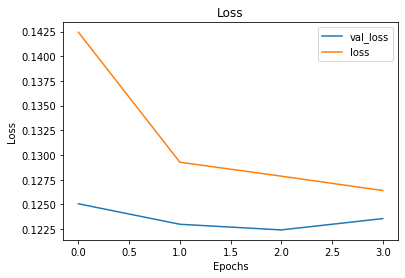

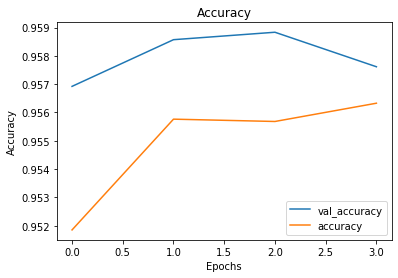

 
                 Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     33323
           1       0.62      0.12      0.20      1555

    accuracy                           0.96     34878
   macro avg       0.79      0.56      0.59     34878
weighted avg       0.95      0.96      0.94     34878

 
                 Confusion Matrix
-------------------------------------------------------


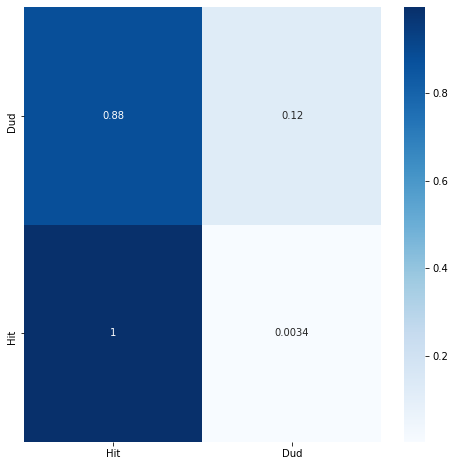

In [69]:
# Set Callback
callback = EarlyStopping(monitor = 'val_accuracy', patience = 3, mode = 'max',
                         min_delta = 0.01, restore_best_weights = True)

# Set model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim = X_train_df.shape[1], activation = 'tanh'))

# Hidden Layers
model.add(Dense(16, activation = 'tanh'))

# Output Layer
model.add(Dense(1, activation = 'sigmoid'))

# Compile
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

# Fit the model
history = model.fit(X_train_df, y_train, batch_size = 32, epochs = 50, 
                    validation_split = 0.3, callbacks = callback)

# Evaluate Model
evaluate_network(history, model, X_test_df, y_test)

## Interpret

For the moment, let's just use our logistic regression model to extract some preliminary feature importances.

### Feature Importances

In [74]:
log.coef_

array([[-0.10566595,  0.15643692, -0.22250906, -0.25222564,  0.22083624,
        -0.83636902, -0.01800518, -0.18836735,  0.48592363, -0.0225327 ,
        -0.29245554, -0.01409265, -0.11919602, -3.94889728, -4.71272017,
        -2.62963729, -1.50145508,  0.21438957,  0.92195757,  0.95973843,
         1.15227388,  2.02151074,  2.96663303,  2.67532021]])

In [75]:
# Pull feature importances
features_dict = {'Features': X_train_df.columns,
                 'Importance': )}

# Convert to a dataframe
feature_importance = pd.DataFrame(features_dict, columns = ['Features', 'Importance'])

print(feature_importance.shape)
feature_importance.head(10)

Exception: Data must be 1-dimensional

### SHAP

In [79]:
import shap

In [81]:
# Setting up SHAP

X_shap = shap.sample(X_train_df, 100)
explainer = shap.LinearExplainer(log, X_train_df)
shap_values = explainer.shap_values(X_shap)

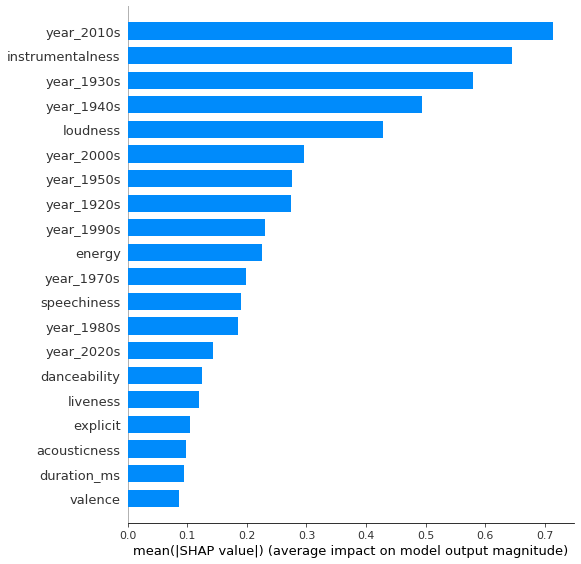

In [83]:
fig = shap.summary_plot(shap_values, X_shap, plot_type = 'bar')

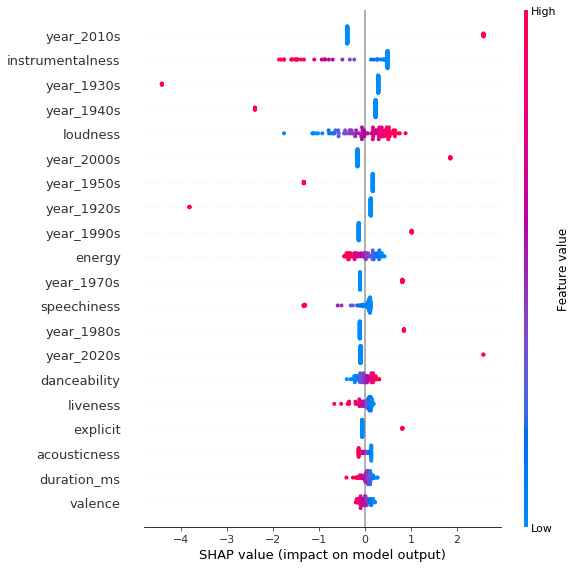

In [84]:
shap.summary_plot(shap_values, X_shap)

## Conclusion